# Consumer

## Imports

In [1]:
import json
import pylab as pl
import numpy as np

from IPython import display

from kafka import KafkaConsumer
from kafka.admin import KafkaAdminClient

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import json
import pylab as pl
import numpy as np

## Input

In [2]:
#KAFKA_HOME = '/root/kafka_2.13-3.2.1'
# kafka server
KAFKA_BOOTSTRAP_SERVERS = ['pd-slave3:9092',]

# definition of the consumer
consumer = KafkaConsumer(bootstrap_servers=KAFKA_BOOTSTRAP_SERVERS, consumer_timeout_ms=100000)
consumer.topics()

{'topic_results', 'topic_stream'}

In [3]:
consumer.subscribe('topic_results')
consumer.subscription()

{'topic_results'}

In [4]:
# print the list of partition IDs 
# e.g. a topic with tree partitions will have partition IDs {0, 1, 2}
consumer.partitions_for_topic('topic_results')

{0}

### Histogram Plotting

In [5]:
def set_axes( ax ):
    ax[0,0].set_xlim([ 0,  63])
    ax[0,1].set_xlim([64, 127])
    ax[0,2].set_xlim([ 0,  63])
    ax[0,3].set_xlim([64, 127])
    ax[0,0].set_ylim([ 0,  70])
    ax[0,1].set_ylim([ 0,  70])
    ax[0,2].set_ylim([ 0,  70])
    ax[0,3].set_ylim([ 0,  70])

    ax[1,0].set_xlim([0,  15])
    ax[1,1].set_xlim([0,  15])
    ax[1,2].set_xlim([0,  15])
    ax[1,3].set_xlim([0,  15])
    ax[1,0].set_ylim([0, 500])
    ax[1,1].set_ylim([0, 500])
    ax[1,2].set_ylim([0, 500])
    ax[1,3].set_ylim([0, 500])

    ax[2,0].set_xlim([ 0, 63])
    ax[2,1].set_xlim([64,127])
    ax[2,2].set_xlim([ 0, 63])
    ax[2,3].set_xlim([64,127])
    ax[2,0].set_ylim([0,   2])
    ax[2,1].set_ylim([0,   2])
    ax[2,2].set_ylim([0,   2])
    ax[2,3].set_ylim([0,   2])

def build_hist( msg, fig, axes ):
    '''
    Function tu build up the histograms in the 
    live dashboard.
    Inputs:
        - msg: message content
        - fig: matplotlib figure
        - axes: list of axes of the figure
    '''
    labels     = [ 'TDC_CHANNEL', 'ORBIT_CNT', 'TDC_CHANNEL' ]
    histograms = [    'histo_CH', 'histo_ORB',    'histo_SC' ]
    
    for i, AX in enumerate(axes): # loop over chambers
        histo = histograms[i]

        for j, ax in enumerate(AX): # loop over histograms
            chamber = 'CH'+str(j)
            ax.clear()
            ax.grid(ls='dotted')
            ax.set_title( chamber )
            ax.set_xlabel(labels[i])
            ax.bar( list(map(int, msg[chamber][histo][ 'bin_edges'])),
                                  msg[chamber][histo]['bin_counts'] )
            ax.tick_params()
            
    set_axes(axes)
    display.clear_output(wait=True)
    display.display(pl.gcf())

KeyboardInterrupt: 

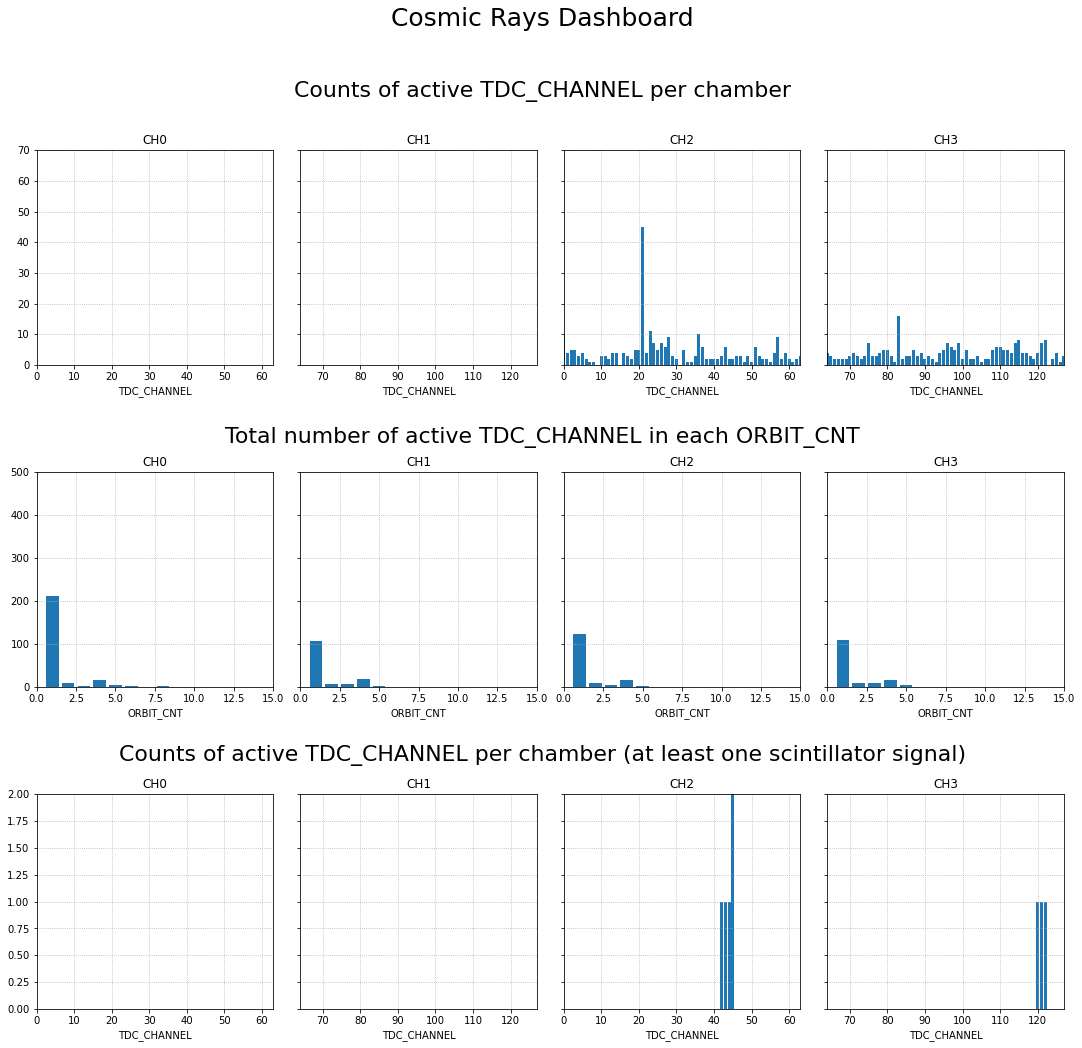

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=4, sharey='row', figsize=(15,13))

fig.suptitle('Cosmic Rays Dashboard', fontsize=25, y=1.1)
fig.tight_layout()
fig.subplots_adjust(hspace=.5)

plt.figtext(0.5, 1.01, 'Counts of active TDC_CHANNEL per chamber', ha='center', va='center', fontsize = 22)
plt.figtext(0.5,  .64, 'Total number of active TDC_CHANNEL in each ORBIT_CNT', ha='center', va='center', fontsize = 22)
plt.figtext(0.5,  .30, 'Counts of active TDC_CHANNEL per chamber (at least one scintillator signal)', ha='center', va='center', fontsize = 22)

for msg in consumer:
    
    msg_json = json.loads(msg.value)
    
    print("Number of hits: ", msg_json['hits'])
    for chamber in range(4):
        print(f"Number of hits - CHAMBER {chamber}:\t", msg_json['CH'+str(chamber)]['total_hits'])
    
    build_hist(msg_json, fig, ax)